In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.shape)
df.head()


In [ ]:
import os

os.getcwd()




In [ ]:
os.listdir()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 显示设置
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# 读取数据
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.shape)
df.head()

In [ ]:
df.info()


In [ ]:
# 先看看 TotalCharges 现在长什么样
df["TotalCharges"].head(10)


In [ ]:
# 把 TotalCharges 强制转成数值
# errors="coerce" 的意思是：转不了的 → NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# 看看现在的信息
df.info()


In [ ]:
df["TotalCharges"].isna().sum()


In [ ]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["MonthlyCharges"])


In [ ]:
df.info()


In [ ]:
df["Churn"].value_counts(normalize=True)
#流失客户比例

In [ ]:
df.groupby("Contract")["Churn"].value_counts(normalize=True)
#合同类型 vs 流失

In [ ]:
sns.boxplot(x="Churn", y="tenure", data=df)
#tenure（在网时间）vs 流失

In [ ]:
# 1) 先看数量
df["Churn"].value_counts()

# 2) 再看比例（更直观）
df["Churn"].value_counts(normalize=True).round(4)


In [ ]:
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Count")
plt.xlabel("Churn")
plt.ylabel("Number of customers")
plt.show()


In [ ]:
# 看不同合同下的流失比例
contract_churn_rate = (
    df.groupby("Contract")["Churn"]
      .value_counts(normalize=True)
      .rename("rate")
      .reset_index()
)

contract_churn_rate


In [ ]:
df.groupby("Contract")["Churn"].value_counts(normalize=True).round(3)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


In [ ]:
# 把 Churn 从 Yes/No 变成 1/0
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# 检查一下
df["Churn"].value_counts()


In [ ]:
# 看每列的数据类型
df.dtypes


In [ ]:
binary_cols = [
    "Partner", "Dependents", "PhoneService", "PaperlessBilling"
]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})


In [ ]:
binary_cols = [
    "Partner", "Dependents", "PhoneService", "PaperlessBilling"
]


In [ ]:
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})



In [ ]:
df[binary_cols].head()


In [ ]:
multi_cols = [
    "gender",
    "Contract",
    "InternetService",
    "PaymentMethod"
]


In [ ]:
df_encoded = pd.get_dummies(
    df,
    columns=multi_cols,
    drop_first=True
)


In [ ]:
df_encoded.shape


In [ ]:
df_encoded.head()


In [ ]:
# y 是我们要预测的目标
y = df_encoded["Churn"]

# X 是除了 Churn 以外的所有特征
X = df_encoded.drop("Churn", axis=1)

# 看一下形状
X.shape, y.shape


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


In [ ]:
X_train.dtypes


In [ ]:
# 从 df_encoded 重新构造 X（而不是 X_train）
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]


In [ ]:
X = X.drop(columns=["customerID"])


In [ ]:
X = pd.get_dummies(X, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
X_train.select_dtypes(include="object").columns


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


In [ ]:
X.isna().sum().sort_values(ascending=False).head(20)


In [ ]:
X.isna().any(axis=1).sum()


In [ ]:
X.isna().mean().sort_values(ascending=False).head(20)


In [ ]:
(X.isna().sum().sort_values(ascending=False).head(10))


In [ ]:
df_clean = df.copy()


In [ ]:
df_clean["Churn"] = df_clean["Churn"].map({"Yes": 1, "No": 0})


In [ ]:
df_clean["TotalCharges"] = pd.to_numeric(
    df_clean["TotalCharges"], errors="coerce"
)


In [ ]:
df_clean = df_clean.drop(columns=["customerID"])


In [ ]:
df_encoded = pd.get_dummies(df_clean, drop_first=True)


In [ ]:
y = df_encoded["Churn"]
X = df_encoded.drop(columns=["Churn"])


In [ ]:
X = X.fillna(X.median())


In [ ]:
X.isna().sum().sum()


In [1]:
import sys
sys.executable


'/Users/wangjingxuan/Kaggle/.venv/bin/python'

In [2]:
from sklearn.model_selection import train_test_split

# 目标变量
y = df["Churn"].map({"Yes": 1, "No": 0})

# 特征（去掉 customerID 和 Churn）
X = df.drop(columns=["customerID", "Churn"])

# 切分训练 / 测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


NameError: name 'df' is not defined

In [3]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.shape


(7043, 21)

In [4]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
from sklearn.model_selection import train_test_split

# 目标变量
y = df["Churn"].map({"Yes": 1, "No": 0})

# 特征
X = df.drop(columns=["customerID", "Churn"])

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((5634, 19), (1409, 19))

In [6]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [7]:
y = df["Churn"].map({"Yes": 1, "No": 0})
y.head()
X = df.drop(columns=["customerID", "Churn"])
X.head()
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

print("数值列数量:", len(num_features))
print("分类列数量:", len(cat_features))

print("\n数值列示例:", list(num_features)[:10])
print("分类列示例:", list(cat_features)[:10])


数值列数量: 3
分类列数量: 16

数值列示例: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
分类列示例: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']


In [8]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])
num_pipeline
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
cat_pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_features),
        ("cat", cat_pipeline, cat_features)
    ]
)
preprocessor
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)



(5634, 19) (1409, 19)
(5634,) (1409,)


In [9]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])
model
model.fit(X_train, y_train)
print("训练完成")


训练完成


In [10]:
y_pred = model.predict(X_test)
y_pred[:20]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.7955997161107168

Classification report:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



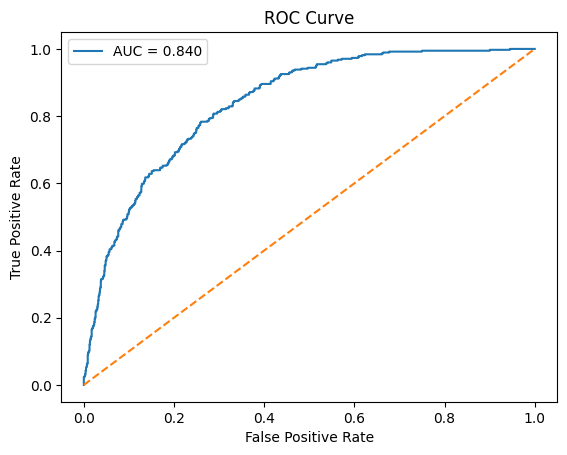

In [11]:
y_prob = model.predict_proba(X_test)[:, 1]
y_prob[:10]
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [12]:
import numpy as np

y_pred_04 = (y_prob >= 0.4).astype(int)

print(classification_report(y_test, y_pred_04))


              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.65      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409

